In [21]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import SpectralSynthesis as ss

In [22]:
image_file = 'C:/Users/C1764397/Desktop/anonymous1546876994/1342220650/level2/psrcPSW/hspirepsw1342220650_20pmp_1462588711215.fits'

In [23]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: C:/Users/C1764397/Desktop/anonymous1546876994/1342220650/level2/psrcPSW/hspirepsw1342220650_20pmp_1462588711215.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     143   ()      
  1  image         1 ImageHDU        47   (1990, 1876)   float64   
  2  error         1 ImageHDU        47   (1990, 1876)   float64   
  3  coverage      1 ImageHDU        47   (1990, 1876)   float64   
  4  History       1 ImageHDU        23   ()      
  5  HistoryScript    1 BinTableHDU     39   89R x 1C   [345A]   
  6  HistoryTasks    1 BinTableHDU     46   62R x 4C   [1K, 27A, 1K, 9A]   
  7  HistoryParameters    1 BinTableHDU     74   411R x 10C   [1K, 20A, 13A, 211A, 1L, 1K, 1L, 74A, 11A, 41A]   


In [24]:
image_data = hdu_list[1].data

In [25]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(1876, 1990)


In [26]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

In [27]:
image_data = crop_center(image_data, 1051,1051)

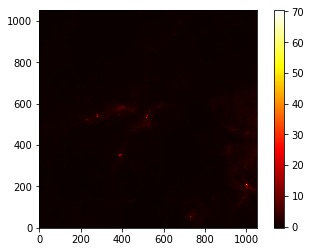

In [28]:
plt.imshow(image_data,cmap = 'hot', origin = 'lower')
plt.colorbar()
plt.show()

In [29]:
image_data[np.where(np.isnan(image_data))] = np.min(np.nan_to_num(image_data))

In [30]:
print(image_data[np.where(image_data == np.min(image_data))])

[-0.3776386 -0.3776386 -0.3776386 -0.3776386 -0.3776386 -0.3776386]


In [31]:
trimmed_image = image_data - np.min(image_data)
trimmed_image = trimmed_image/np.max(trimmed_image)

trimmed_image[np.where(trimmed_image == 0)] = np.sort(trimmed_image.flatten()[np.where(trimmed_image.flatten()!=0)])[0]/2
print(np.min(trimmed_image))

1.9772412817485704e-05


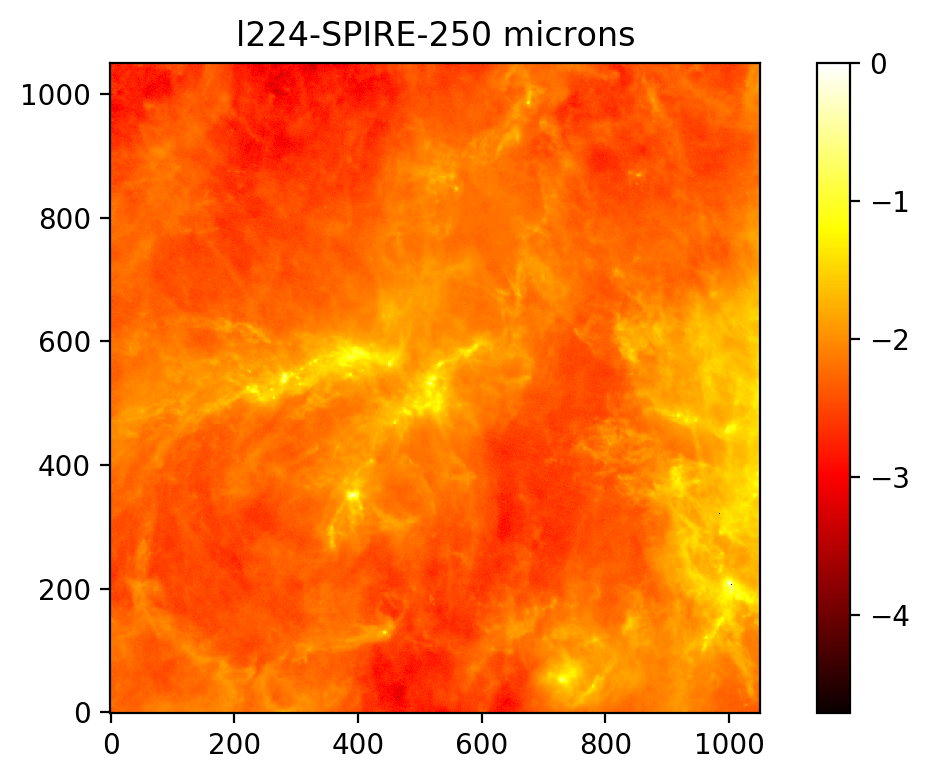

In [32]:
plt.figure(dpi=200)
plt.imshow(np.log10(trimmed_image),cmap = 'hot',origin='lower')
plt.title('l224-SPIRE-250 microns')
plt.tight_layout()
plt.savefig('C:/Users/C1764397/Workshop/PhD/Meetings/AntMeeting_2019_01_10/Hi-GAL-SPIRE250.png')
plt.colorbar()
plt.show()

In [33]:
image = np.log10(trimmed_image)

In [34]:
import cv2

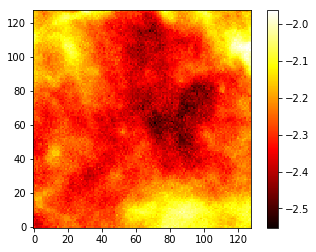

In [35]:
SUB_SIZE = 128

crop_img = image[0:0+SUB_SIZE, 0:0+SUB_SIZE]
plt.imshow(crop_img,cmap = 'hot',origin = 'lower')
plt.colorbar()
plt.show()

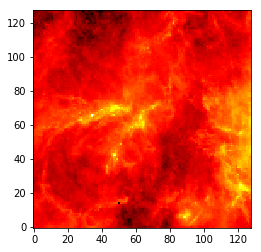

In [36]:
IMG_SIZE = 128

new_array = cv2.resize(image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='hot', origin = 'lower')
plt.show()

-2.2160467624946634


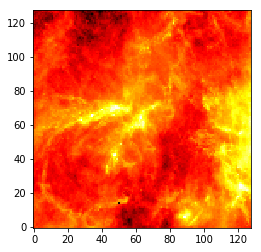

In [37]:
m_1_field = np.mean(new_array)
s_1_field = np.std(new_array)
m_2_field = 0
s_2_field = 1/4

print(m_1_field)

new_array *= s_2_field/s_1_field
new_array += (m_2_field-m_1_field*s_2_field/s_1_field)

new_array[np.where(new_array>1.)] = 1.
new_array[np.where(new_array<-1.)] = -1.
    
new_array = (new_array-np.min(new_array))/(np.max(new_array)-np.min(new_array))

plt.imshow(new_array, cmap='hot', origin = 'lower')
plt.show()

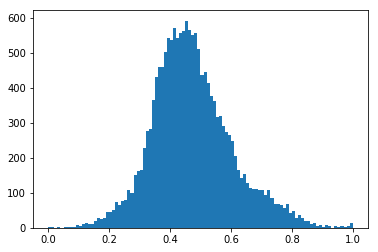

In [38]:
plt.hist(new_array.flatten(),bins = 100)
plt.show()

In [39]:
print(new_array)

[[0.42078444 0.4546469  0.46504498 ... 0.42566638 0.42620019 0.40548202]
 [0.48269859 0.45113821 0.42742012 ... 0.51248524 0.44024459 0.45040137]
 [0.47471064 0.46512781 0.41725417 ... 0.43506017 0.50166633 0.47543188]
 ...
 [0.19696824 0.1984722  0.25427245 ... 0.4775477  0.55930255 0.56439573]
 [0.26039398 0.17491023 0.20436322 ... 0.43527454 0.57550286 0.53439237]
 [0.22305687 0.2273034  0.24506738 ... 0.43873201 0.53517455 0.5647147 ]]


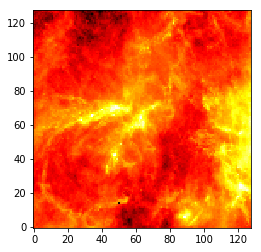

In [40]:
IMG_SIZE = 128

new_array = cv2.resize(new_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='hot', origin = 'lower')
plt.show()

In [41]:
X = np.array(new_array).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [42]:
print(X)

[[[[0.42078444]
   [0.4546469 ]
   [0.46504498]
   ...
   [0.42566638]
   [0.42620019]
   [0.40548202]]

  [[0.48269859]
   [0.45113821]
   [0.42742012]
   ...
   [0.51248524]
   [0.44024459]
   [0.45040137]]

  [[0.47471064]
   [0.46512781]
   [0.41725417]
   ...
   [0.43506017]
   [0.50166633]
   [0.47543188]]

  ...

  [[0.19696824]
   [0.1984722 ]
   [0.25427245]
   ...
   [0.4775477 ]
   [0.55930255]
   [0.56439573]]

  [[0.26039398]
   [0.17491023]
   [0.20436322]
   ...
   [0.43527454]
   [0.57550286]
   [0.53439237]]

  [[0.22305687]
   [0.2273034 ]
   [0.24506738]
   ...
   [0.43873201]
   [0.53517455]
   [0.5647147 ]]]]


In [43]:
import tensorflow as tf

C:\Users\C1764397\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [44]:
model = tf.keras.models.load_model("C:/Users/C1764397/Workshop/PhD/Data/Hi-Gal/l224_SPIRE_250um/5-conv-512-channels-5-dense-100-epochs-1555584997.model")

In [45]:
import time

In [46]:
start = time.time()
prediction = model.predict(X)
end = time.time()

print(end-start)

0.6298024654388428


In [47]:
print(prediction)

[array([[0.5826354]], dtype=float32), array([[0.61534005]], dtype=float32)]


C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)


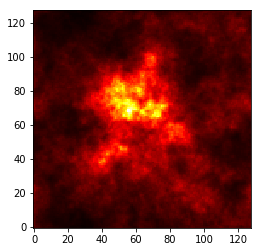

In [48]:
plt.imshow(ss.fBm(E=2,H=prediction[0][0],sigma = prediction[1][0],N=128,exp=True), cmap = 'hot', origin = 'lower')
plt.show()

In [49]:
H = prediction[0][0]
sigma = prediction[1][0]

In [50]:
import SpectralSynthesis as ss

In [51]:
field = ss.fBm(N=400,E=2,H=H,sigma = sigma)
field = field[150:250,150:250]

C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)


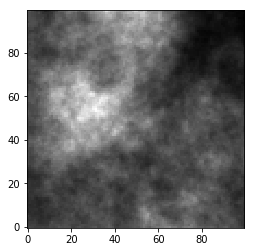

In [52]:
plt.imshow(field,cmap='gray',origin='lower')
plt.show()

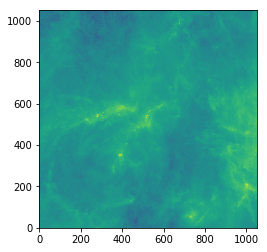

In [53]:
plt.imshow(image,origin='lower')

In [54]:
print(np.shape(image))

(1051, 1051)


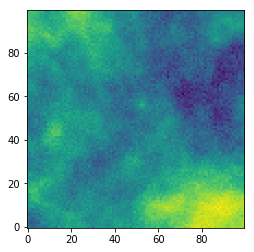

In [55]:
plt.imshow(image[0:100,0:100],origin='lower')

In [56]:
from tqdm import tqdm

In [63]:
H_array = np.zeros(np.shape(image))
sigma_array = np.zeros(np.shape(image))

print(np.arange(np.shape(image)[0]))

for y in tqdm(np.arange(np.shape(image)[1])):
    for x in np.arange(np.shape(image)[0]):
        sub_field = image[x-64:x+64,y-64:y+64]
        if np.shape(sub_field) == (128,128):
            m_1_field = np.mean(sub_field)
            s_1_field = np.std(sub_field)
            m_2_field = 0
            s_2_field = 1/4

            sub_field *= s_2_field/s_1_field
            sub_field += (m_2_field-m_1_field*s_2_field/s_1_field)
            
            X = np.array(sub_field).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
            
            prediction = model.predict(X)
            H = prediction[0][0]
            sigma = prediction[1][0]
            
            H_array[x,y]=H
            sigma_array[x,y]=sigma
        if H_array[x,y] == 0:
            print(x,y, H_array[x,y])

[   0    1    2 ... 1048 1049 1050]






  0%|                                                                                         | 0/1051 [00:00<?, ?it/s]

0 0 0.0
1 0 0.0
2 0 0.0
3 0 0.0
4 0 0.0
5 0 0.0
6 0 0.0
7 0 0.0
8 0 0.0
9 0 0.0
10 0 0.0
11 0 0.0
12 0 0.0
13 0 0.0
14 0 0.0
15 0 0.0
16 0 0.0
17 0 0.0
18 0 0.0
19 0 0.0
20 0 0.0
21 0 0.0
22 0 0.0
23 0 0.0
24 0 0.0
25 0 0.0
26 0 0.0
27 0 0.0
28 0 0.0
29 0 0.0
30 0 0.0
31 0 0.0
32 0 0.0
33 0 0.0
34 0 0.0
35 0 0.0
36 0 0.0
37 0 0.0
38 0 0.0
39 0 0.0
40 0 0.0
41 0 0.0
42 0 0.0
43 0 0.0
44 0 0.0
45 0 0.0
46 0 0.0
47 0 0.0
48 0 0.0
49 0 0.0
50 0 0.0
51 0 0.0
52 0 0.0
53 0 0.0
54 0 0.0
55 0 0.0
56 0 0.0
57 0 0.0
58 0 0.0
59 0 0.0
60 0 0.0
61 0 0.0
62 0 0.0
63 0 0.0
64 0 0.0
65 0 0.0
66 0 0.0
67 0 0.0
68 0 0.0
69 0 0.0
70 0 0.0
71 0 0.0
72 0 0.0
73 0 0.0
74 0 0.0
75 0 0.0
76 0 0.0
77 0 0.0
78 0 0.0
79 0 0.0
80 0 0.0
81 0 0.0
82 0 0.0
83 0 0.0
84 0 0.0
85 0 0.0
86 0 0.0
87 0 0.0
88 0 0.0
89 0 0.0
90 0 0.0
91 0 0.0
92 0 0.0
93 0 0.0
94 0 0.0
95 0 0.0
96 0 0.0
97 0 0.0
98 0 0.0
99 0 0.0
100 0 0.0
101 0 0.0
102 0 0.0
103 0 0.0
104 0 0.0
105 0 0.0
106 0 0.0
107 0 0.0
108 0 0.0
109 0 0.0
110 0 0.0


KeyboardInterrupt: 